**Advanced Python Assignment 2 #1:
Approaching a Machine Learning Problem**

First, import panda and read the csv file "heart" to start analyze data:

In [ ]:
import pandas as pd
heart = pd.read_csv('heart.csv')

Take a look of the shape of this csv file:

In [ ]:
print(heart.shape)

(303, 14)


Print the age statistics of the csv file:

In [ ]:
print("The study on this data is done on people  between {0} and {1} of age.".format(heart['age'].min(),heart['age'].max()))

The study on this data is done on people  between 29 and 77 of age.


Check if there is null value in the file (no in this case):

In [ ]:
print(heart.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Replace the column name from short form to the name for better understanding:

In [ ]:
col_name_map = {'cp': 'chest_pain_type',
                'trestbps': 'rest_bp',
                'chol': 'serum_cholestrol',
                'fbs': 'fasting_blood_sugar',
                'restecg': 'rest_ecg_level',
                'thalach': 'max_heart_rate',
                'exang': 'exercise_induced_angina',
                'oldpeak': 'st_depression',
                'slope': 'st_slope_type',
                'ca': 'major_vessel_count',
                'thal': 'thalium_stress_test_result',
                'target': 'diagnosis'}
heart.rename(mapper=col_name_map, axis=1, inplace=True)

***Here, I learned the new method for DataFrame "rename" that can change the name to better analyze them later.***

Change categorical data from numbers to text that can better understandable by humans:

In [ ]:
# Sex Column (1 = male, 0=female)
heart.loc[heart['sex'] == 1, 'sex'] = 'male'
heart.loc[heart['sex'] == 0, 'sex'] = 'female'

# chest_pain_type
heart.loc[heart['chest_pain_type'] == 0, 'chest_pain_type'] = 'Typical Angina'
heart.loc[heart['chest_pain_type'] == 1, 'chest_pain_type'] = 'Atypical Angina'
heart.loc[heart['chest_pain_type'] == 2, 'chest_pain_type'] = 'Non-anginal Pain'
heart.loc[heart['chest_pain_type'] == 3, 'chest_pain_type'] = 'Asymptomatic Pain'

# fasting_blood_sugar --> fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
heart.loc[heart['fasting_blood_sugar'] == 0, 'fasting_blood_sugar'] = 'Lower than 120 mg/dl'
heart.loc[heart['fasting_blood_sugar'] == 1, 'fasting_blood_sugar'] = 'Higher than 120 mg/dl'

# rest_ecg_level
heart.loc[heart['rest_ecg_level'] == 0, 'rest_ecg_level'] = 'Normal'
heart.loc[heart['rest_ecg_level'] == 1, 'rest_ecg_level'] = 'ST-T Wave Abnormality'
heart.loc[heart['rest_ecg_level'] == 2, 'rest_ecg_level'] = 'Left ventricular hypertrophy'

# exercise_enduced_angina --> (1=yes, 0=no)
heart.loc[heart['exercise_induced_angina'] == 0, 'exercise_induced_angina'] = 'No'
heart.loc[heart['exercise_induced_angina'] == 1, 'exercise_induced_angina'] = 'Yes'

# st_slope_type
heart.loc[heart['st_slope_type'] == 0, 'st_slope_type'] = 'Upsloping'
heart.loc[heart['st_slope_type'] == 1, 'st_slope_type'] = 'Flat'
heart.loc[heart['st_slope_type'] == 2, 'st_slope_type'] = 'Downsloping'

# thalium_stress_test_result
heart.loc[heart['thalium_stress_test_result'] == 0, 'thalium_stress_test_result'] = 'Null'
heart.loc[heart['thalium_stress_test_result'] == 1, 'thalium_stress_test_result'] = 'Fixed Defect'
heart.loc[heart['thalium_stress_test_result'] == 2, 'thalium_stress_test_result'] = 'Normal'
heart.loc[heart['thalium_stress_test_result'] == 3, 'thalium_stress_test_result'] = 'Reversible Defect'

Change the datatype:

In [ ]:
cat_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg_level', 'exercise_induced_angina', 'st_slope_type', 'thalium_stress_test_result']
for col in cat_cols:
    heart[col] = heart[col].astype('object')

Import matplotlib and seaborn to visualize the data:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

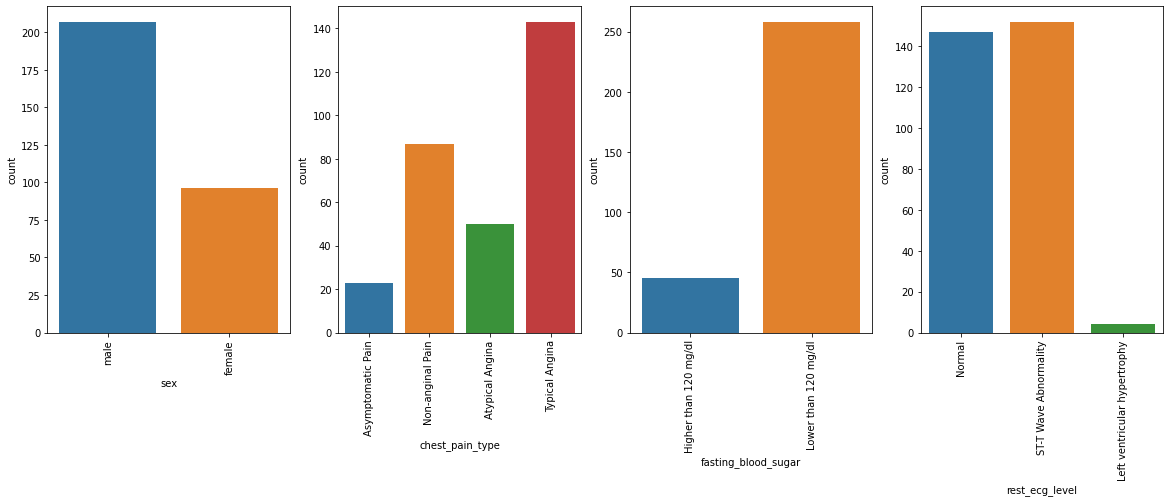

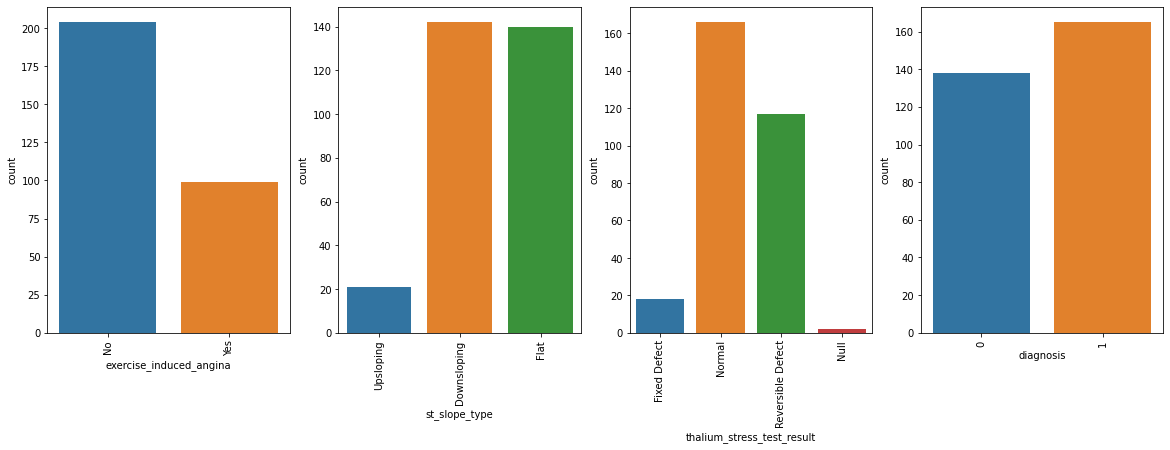

In [ ]:
col_to_plot = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg_level',
               'exercise_induced_angina', 'st_slope_type', 'thalium_stress_test_result', 'diagnosis']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for col, ax in zip(col_to_plot, axes):
    sns.countplot(x=col, data=heart, ax=ax)
    ax.tick_params('x', labelrotation=90)

fig2, axes2 = plt.subplots(nrows=1, ncols=4, figsize=(20,6))
for col, ax in zip(col_to_plot[4:], axes2):
    sns.countplot(x=col, data=heart, ax=ax)
    ax.tick_params('x', labelrotation=90)

Make a map of corrlation:

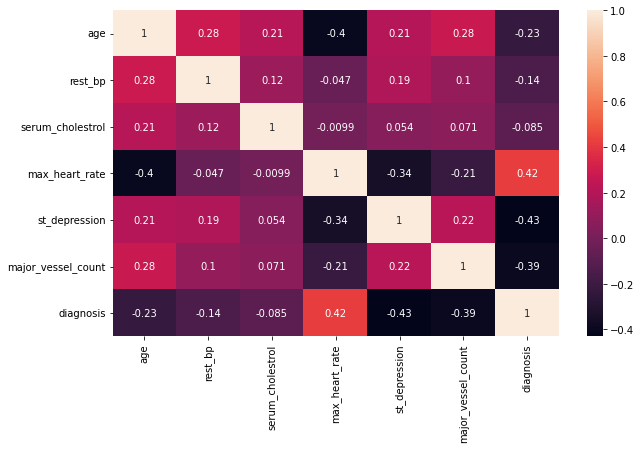

In [ ]:
corr = heart.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)



---

# Model Building:

1. Separate target variables to make the model generalizes better

In [ ]:
X = heart.drop('diagnosis', axis=1)
y = heart.diagnosis

2. Getting dummies from categorical Values

In [ ]:
X = pd.get_dummies(X)

3. Split into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,     random_state=0)



---
# Training


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

Check how well it did:

In [ ]:
score = classifier.score(X_test, y_test)
print("Score on the test set: {}".format(score))

Score on the test set: 0.868421052631579


***In conclusion, this project is really simple Machine learning project with some new method used through this project. I learned some new method such as "rename" that can better analyze data by humans.***